#### 1. Import libraries, instatiate the environment.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import time
def dqn(n_episodes, eps_start, eps_end, eps_decay):
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    start = time.time()
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        while True:
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        if i_episode % 100 == 0:
            print(f"\rEpisode:{i_episode}, \tTime elapsed: {(time.time()-start)/60:.2f} minutes.")
            print('\rAverage Score: {:.2f}'.format(np.mean(scores_window)))

        if np.mean(scores_window)>=14.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            # save the DQN
            torch.save(agent.qnetwork_local.state_dict(), 'trained_model.pth')
            break
    return scores

# Instatiatie Environment
env = UnityEnvironment(file_name="Banana.app", no_graphics=True)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 2. Instatiate an agent.
#### The hyperparameters of the DQN (layer sizes and activation functions) are defined inside rl_agent.py
#### The design used is 2x hidden layers of sizes 128 and 256 respectively and tanh is the activation function used for both layers.
#### Learning rate is 0.001 and batch size is 128.

In [2]:
from rl_agent import Agent
agent = Agent(state_size, action_size, seed=0)

Using device: cpu
DQN Structure created! 
Layers: ModuleList(
  (0): Linear(in_features=37, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=256, bias=True)
  (2): Linear(in_features=256, out_features=4, bias=True)
) 
Activation Functions:[<function tanh at 0x7fb789219620>, <function tanh at 0x7fb789219620>]
DQN Structure created! 
Layers: ModuleList(
  (0): Linear(in_features=37, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=256, bias=True)
  (2): Linear(in_features=256, out_features=4, bias=True)
) 
Activation Functions:[<function tanh at 0x7fb789219620>, <function tanh at 0x7fb789219620>]


## 3. Train the model.
### Training stops either at 1000 episodes or when the average score of the last 100 episodes is >14.0
#### (if already trained, move to evaluation or demonstration directly)

/Users/ioannis.mallioras/miniconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode:100, 	Time elapsed: 3.52 minutes.
Average Score: 1.05
Episode:200, 	Time elapsed: 7.03 minutes.
Average Score: 4.23
Episode:300, 	Time elapsed: 10.54 minutes.
Average Score: 6.16
Episode:400, 	Time elapsed: 14.06 minutes.
Average Score: 8.33
Episode:500, 	Time elapsed: 17.58 minutes.
Average Score: 10.55
Episode:600, 	Time elapsed: 21.10 minutes.
Average Score: 13.40

Environment solved in 550 episodes!	Average Score: 14.02


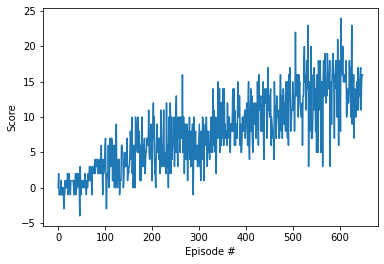

In [3]:
# Select Training parameters
N_EPISODES = 1000
eps_start = 1.0
eps_end = 0.001
eps_decay = 0.995
scores =[]

# Train the model
scores = dqn(N_EPISODES, eps_start, eps_end, eps_decay)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show("Score progression during training")


## 4. Evaluate the trained DQN-based agent.

/Users/ioannis.mallioras/miniconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 0 Score: 15.0
Episode 10 Score: 14.0
Episode 20 Score: 19.0
Episode 30 Score: 7.0
Episode 40 Score: 9.0
Episode 50 Score: 16.0
Episode 60 Score: 16.0
Episode 70 Score: 13.0
Episode 80 Score: 9.0
Episode 90 Score: 13.0

Average Score: 14.19


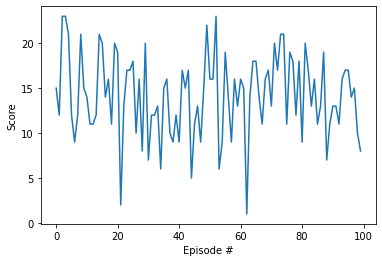

In [4]:
# Load the pre-trained agent
agent.qnetwork_local.load_state_dict(torch.load("trained_model.pth"))
scores = deque(maxlen=100)                  # last 100 scores
for i_episode in range(100):
    score = 0
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    while True:
        action = agent.act(state)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    scores.append(score)       # save most recent score
    if i_episode%10==0:
        print("Episode {} Score: {}".format(i_episode, score))


print('\nAverage Score: {:.2f}'.format(np.mean(scores)))

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show("Score progression during evaluation")
env.close()

## 5. Watch the trained agent.
### Restart the kernel, and run this next section directly.

In [ ]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import time

# Instatiatie Environment
env = UnityEnvironment(file_name="Banana.app", no_graphics=False)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

from rl_agent import Agent
agent = Agent(state_size, action_size, seed=0)
agent.qnetwork_local.load_state_dict(torch.load("trained_model.pth"))

for i_episode in range(10):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    while True:
        action = agent.act(state)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break

env.close()